In [9]:
import mikeio
import numpy as np

In [2]:
f = r"C:\Users\pl1b5j\Documents\MIKE Zero Projects\MIKE_21\FlowModel_FM\MT\HoBay\Data\Forcings\Database\e5--1.dfsu"

In [3]:
ds = mikeio.read(f)
ds

<mikeio.Dataset>
dims: (time:1, element:6109)
time: 2004-04-15 00:00:21 (time-invariant)
geometry: Dfsu2D (6109 elements, 3266 nodes)
items:
  0:  Wave height <Wave height> (meter)
  1:  Wave period <Wave period> (second)
  2:  Wave direction <Wave direction> (degree)

In [4]:
da = ds['Wave direction']
da

<mikeio.DataArray>
name: Wave direction
dims: (time:1, element:6109)
time: 2004-04-15 00:00:21 (time-invariant)
geometry: Dfsu2D (6109 elements, 3266 nodes)

(450000.0, 475000.0)

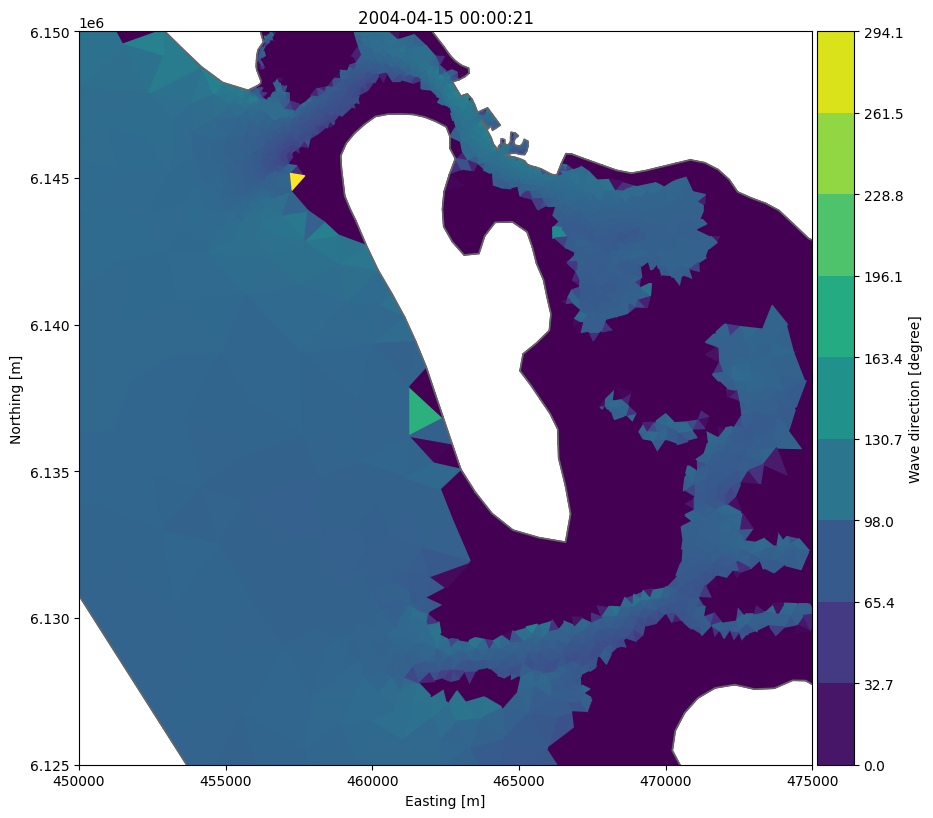

In [6]:
ax = da.plot(figsize=(10, 10))
ax.set_ylim([6125000, 6150000])
ax.set_xlim([450000, 475000])

<Axes: title={'center': '2004-04-15 00:00:21'}, xlabel='Easting [m]', ylabel='Northing [m]'>

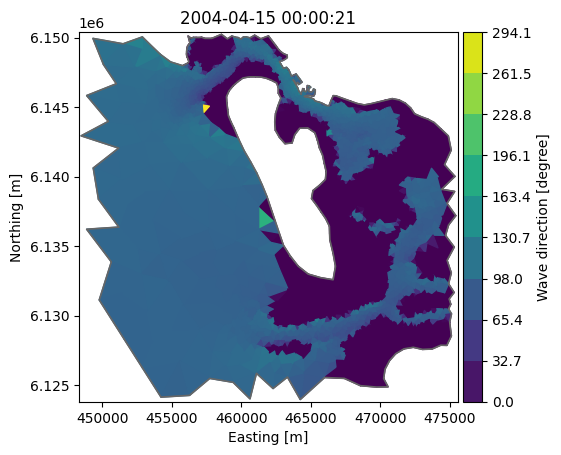

In [7]:
da.sel(area=(450000, 6125000, 475000, 6150000)).plot()

In [24]:
da50 = da.copy()
da50[da<50] = np.nan

<Axes: title={'center': '2004-04-15 00:00:21'}, xlabel='Easting [m]', ylabel='Northing [m]'>

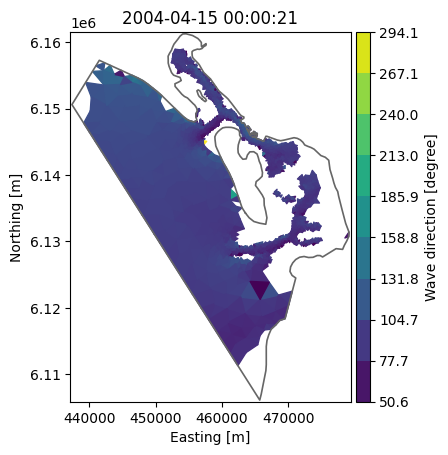

In [27]:
da50.plot()

In [31]:
g = da.geometry.get_overset_grid(dx=10)
g

<mikeio.Grid2D>
x: [4.374e+05, 4.374e+05, ..., 4.791e+05] (nx=4172, dx=10)
y: [6.106e+06, 6.106e+06, ..., 6.161e+06] (ny=5516, dy=10)
projection: UTM-32

In [32]:
da_grid = da.interp_like(g)

<Axes: xlabel='Easting [m]', ylabel='Northing [m]'>

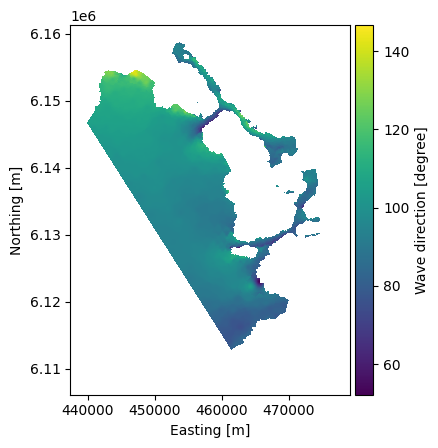

In [34]:
da_grid.plot()

In [35]:
da_grid.to_dfs("dfsu_to_dfs2.dfs2")